# NLP Application with ML

## Classification of Tweets Data

### The Data

🔑 Source: https://www.kaggle.com/crowdflower/twitter-airline-sentiment?select=Tweets.csv

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from collections import Counter
from sklearn.metrics import f1_score
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

### Notebook Settings

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_colwidth', None)

sns.set_context(context='talk', font_scale=1, rc={'figure.figsize':(11.7,8.27)})
pd.set_option('display.float_format', lambda x: '%.2f' % x)

### Getting Data

In [3]:
# For Colab
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
df = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/Clarusway_NLP/Clarusway/clarusway-ds-students-7-21-main/3- Classes_Labs/NLP/NLP-1/airline_tweets.csv')
#df = pd.read_csv("airline_tweets.csv")


In [5]:
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.00,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.35,NaN,0.00,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials to the experience... tacky.,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.68,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I need to take another trip!,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.00,Bad Flight,0.70,Virgin America,NaN,jnardino,NaN,0,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse",NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.00,Can't Tell,1.00,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing about it,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


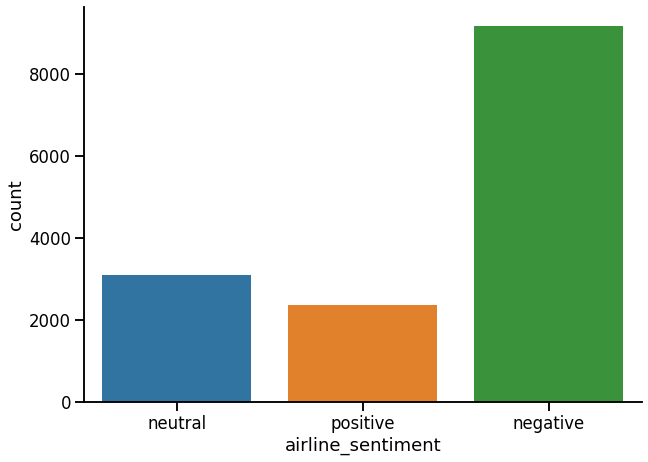

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 7.27)
sns.countplot(data =df, x = "airline_sentiment")
sns.despine();

In [ ]:
df["airline_sentiment"].value_counts()

negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64

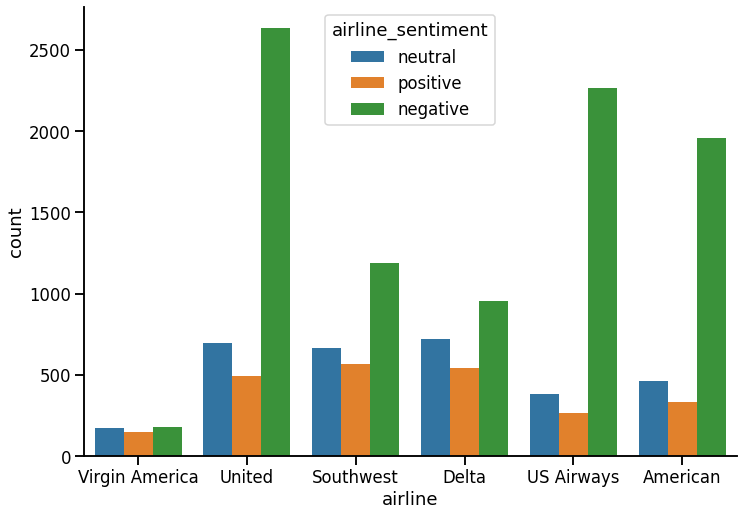

In [ ]:
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(11.7, 8.27)
sns.countplot(data = df, x ="airline", hue = "airline_sentiment")
sns.despine();

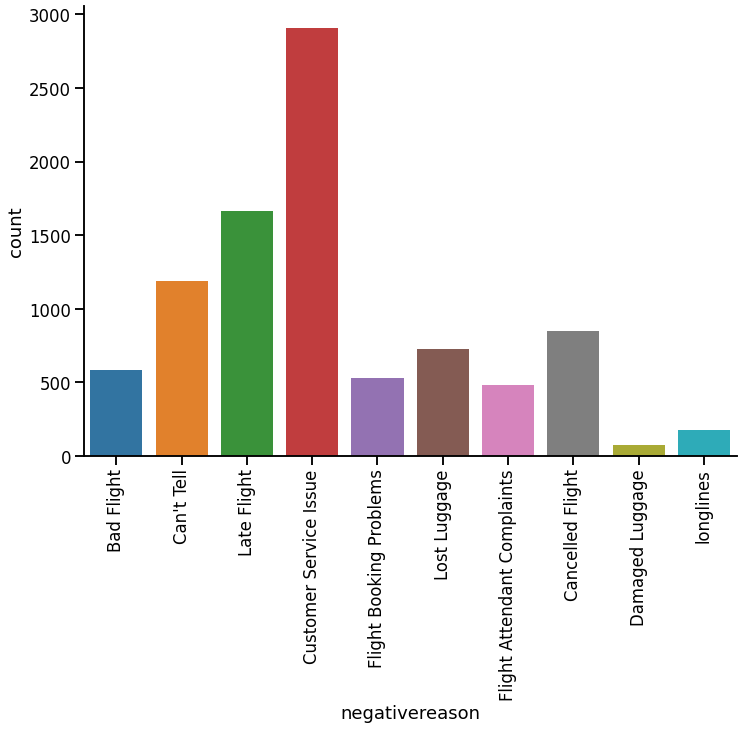

In [ ]:
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(11.7, 8.27)
sns.countplot(data =df, x ="negativereason")
plt.xticks(rotation =90)
sns.despine();

## Cleaning Data

In [6]:
df2 = df.copy()

In [7]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [9]:
stop_words = stopwords.words('english')
words_to_exclude_from_stopwords = ['not', "n't", 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", "don't", 'hadn', 
                                   "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn', "mustn't", 
                                   'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", 'won', 
                                   "won't", 'wouldn', "wouldn't"]

new_stopwords = [w for w in stop_words if w not in words_to_exclude_from_stopwords]

In [10]:
def cleaning(data):

    import re
    
    #1. Removing URLS
    data = re.sub(r'http\S+', '', data)

    #2. Removing Tags
    data = re.sub(r'#\w+', '', data)

    #3. Removing Mentions
    data = re.sub(r'@\w+', '', data)

    #4. Contractions Expension & Tokenize
    #text_tokens = word_tokenize(contractions.fix(data.lower())) 
    text_tokens = word_tokenize(data.replace("'", '').lower())

    # #5. Removing mentions
    tokens_without_mention = [w for w in text_tokens if not w.startswith('@')]
    
    #6. Remove Puncs
    tokens_without_punc = [w for w in tokens_without_mention if w.isalpha()]
    
    #7. Removing Stopwords
    tokens_without_sw = [t for t in tokens_without_punc if t not in new_stopwords]
    
    #8. lemma
    text_cleaned  = [WordNetLemmatizer().lemmatize(t) for t in tokens_without_sw]
    
    #joining
    return " ".join(text_cleaned)

In [ ]:
words = pd.Series(" ".join(df2["text"]).split()).value_counts()
words

to               8535
the              5781
I                5054
a                4359
for              3921
                 ... 
Line.               1
business...so       1
fasten              1
$2,000              1
commitment??        1
Length: 30105, dtype: int64

In [11]:
df2["cleaned_text"] = df2["text"].apply(cleaning)
df2[['text', 'cleaned_text']]

,text,cleaned_text
0,@VirginAmerica What @dhepburn said.,said
1,@VirginAmerica plus you've added commercials to the experience... tacky.,plus youve added commercial experience tacky
2,@VirginAmerica I didn't today... Must mean I need to take another trip!,didnt today must mean need take another trip
3,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse",really aggressive blast obnoxious entertainment guest face amp little recourse
4,@VirginAmerica and it's a really big bad thing about it,really big bad thing
...,...,...
14635,@AmericanAir thank you we got on a different flight to Chicago.,thank got different flight chicago
14636,@AmericanAir leaving over 20 minutes Late Flight. No warnings or communication until we were 15 minutes Late Flight. That's called shitty customer svc,leaving minute late flight warning communication minute late flight thats called shitty customer svc
14637,@AmericanAir Please bring American Airlines to #BlackBerry10,please bring american airline
14638,"@AmericanAir you have my money, you change my flight, and don't answer your phones! Any other suggestions so I can make my commitment??",money change flight dont answer phone suggestion make commitment


## Features and Label

In [12]:
df2.rename(columns={'airline_sentiment':'sentiment'}, inplace=True)
df2 = df2.loc[:, ["sentiment", "cleaned_text"]]
df2.head()

,sentiment,cleaned_text
0,neutral,said
1,positive,plus youve added commercial experience tacky
2,neutral,didnt today must mean need take another trip
3,negative,really aggressive blast obnoxious entertainment guest face amp little recourse
4,negative,really big bad thing


## Train Test Split

In [13]:
X = df2['cleaned_text']
y = df2['sentiment']

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=4299)

In [ ]:
X_train.sample()

13094    hold since one get airport cancelled flight flight dont make u pay huge fee change flight
Name: cleaned_text, dtype: object

## Vectorization

In [15]:
from sklearn.feature_extraction.text import CountVectorizer

In [16]:
vectorizer = CountVectorizer(preprocessor=cleaning, min_df=2, ngram_range=(1,2))
X_train_count = vectorizer.fit_transform(X_train)
X_test_count = vectorizer.transform(X_test)

In [17]:
X_test_count.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
vectorizer.get_feature_names_out()[:20]

array(['aa', 'aa agent', 'aa amp', 'aa customer', 'aa dallas',
       'aa doesnt', 'aa email', 'aa employee', 'aa family', 'aa flight',
       'aa gate', 'aa gold', 'aa help', 'aa mile', 'aa monday',
       'aa number', 'aa platinum', 'aa possible', 'aa usair', 'aa would'],
      dtype=object)

In [ ]:
pd.DataFrame(X_train_count.toarray(), columns = vectorizer.get_feature_names_out())

,aa,aa agent,aa amp,aa customer,aa dallas,aa doesnt,aa email,aa employee,aa family,aa flight,aa gate,aa gold,aa help,aa mile,aa monday,aa number,aa platinum,aa possible,aa usair,aa would,aadv,aadv svc,aadvantage,aadvantage number,abc,...,youve completely,youve got,youve known,youve lost,youve misunderstood,yr,yr flying,yr old,yr team,yuma,yummy,yup,yvonne,yvonne anthony,yvr,yyz,yyz terminal,zero,zero communication,zero entertainment,zero response,zone,zone nine,zoom,zurich
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11707,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
11708,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
11709,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
11710,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## Model Comparisons - Vectorization

In [18]:
from sklearn.metrics import plot_confusion_matrix, classification_report

In [19]:
def eval(model, X_test):
    preds = model.predict(X_test)
    print(classification_report(y_test, preds))
    sns.set_context('talk')
    fig, ax = plt.subplots(figsize=(7, 7))
    plot_confusion_matrix(model, X_test, y_test, ax = ax, values_format = '.0f')

## Naive Bayes

In [20]:
from sklearn.naive_bayes import MultinomialNB # BernoulliNB

In [21]:
nb = MultinomialNB()
nb.fit(X_train_count,y_train)

MultinomialNB()

NB MODEL
              precision    recall  f1-score   support

    negative       0.79      0.93      0.85      1835
     neutral       0.68      0.42      0.52       620
    positive       0.78      0.60      0.68       473

    accuracy                           0.77      2928
   macro avg       0.75      0.65      0.68      2928
weighted avg       0.76      0.77      0.76      2928



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


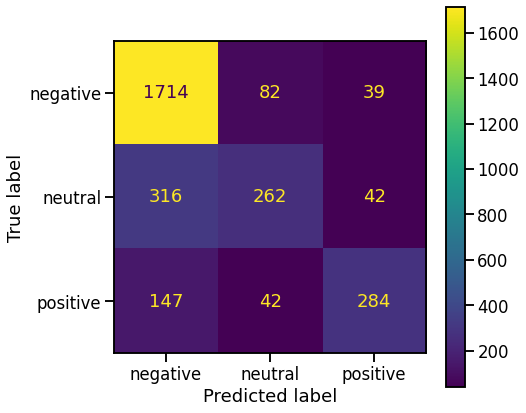

In [ ]:
print("NB MODEL")
eval(nb, X_test_count)

## Logistic Regression

In [22]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression(max_iter=1000)
log.fit(X_train_count,y_train)

LogisticRegression(max_iter=1000)

LOG MODEL
              precision    recall  f1-score   support

    negative       0.85      0.90      0.87      1835
     neutral       0.64      0.60      0.62       620
    positive       0.74      0.66      0.70       473

    accuracy                           0.80      2928
   macro avg       0.75      0.72      0.73      2928
weighted avg       0.79      0.80      0.79      2928



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


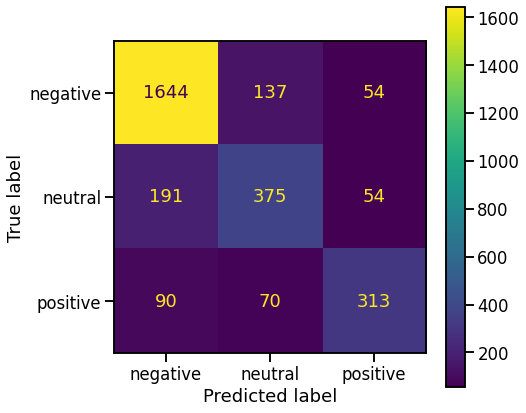

In [ ]:
print("LOG MODEL")
eval(log, X_test_count)

In [ ]:
log = LogisticRegression(max_iter=1000, class_weight='balanced')
log.fit(X_train_count,y_train)

LogisticRegression(class_weight='balanced', max_iter=1000)

LOG MODEL BALANCED
              precision    recall  f1-score   support

    negative       0.89      0.82      0.86      1835
     neutral       0.58      0.69      0.63       620
    positive       0.68      0.72      0.70       473

    accuracy                           0.78      2928
   macro avg       0.72      0.74      0.73      2928
weighted avg       0.79      0.78      0.78      2928



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


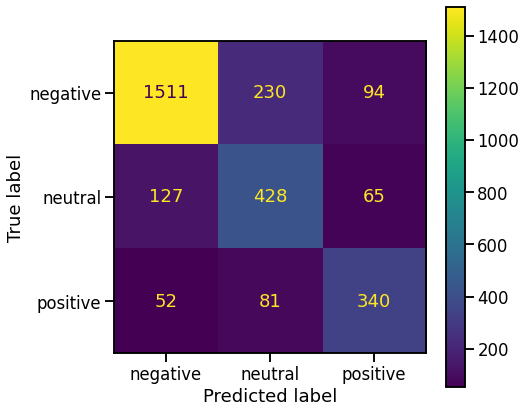

In [ ]:
print("LOG MODEL BALANCED")
eval(log, X_test_count)

## SVM

In [ ]:
from sklearn.svm import LinearSVC
svc = LinearSVC(C=0.2)
svc.fit(X_train_count,y_train)

LinearSVC(C=0.2)

SVC MODEL
              precision    recall  f1-score   support

    negative       0.85      0.89      0.87      1835
     neutral       0.63      0.60      0.61       620
    positive       0.72      0.66      0.69       473

    accuracy                           0.79      2928
   macro avg       0.73      0.71      0.72      2928
weighted avg       0.78      0.79      0.78      2928



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


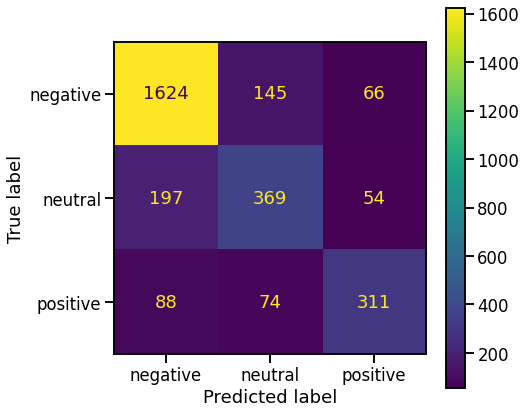

In [ ]:
print("SVC MODEL")
eval(svc, X_test_count)

## KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_count,y_train)

KNeighborsClassifier(n_neighbors=3)

KNN MODEL
              precision    recall  f1-score   support

    negative       0.74      0.63      0.68      1835
     neutral       0.30      0.47      0.36       620
    positive       0.61      0.50      0.55       473

    accuracy                           0.57      2928
   macro avg       0.55      0.53      0.53      2928
weighted avg       0.63      0.57      0.59      2928



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


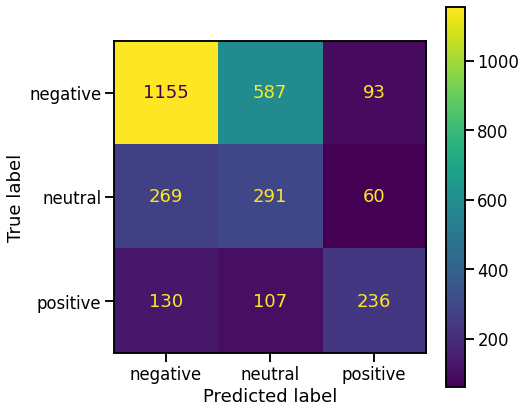

In [ ]:
print("KNN MODEL")
eval(knn, X_test_count)

## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(200, random_state = 4299, n_jobs = -1) # class_weight="balanced"
rf.fit(X_train_count, y_train)

RandomForestClassifier(n_estimators=200, n_jobs=-1, random_state=4299)

RF MODEL
              precision    recall  f1-score   support

    negative       0.82      0.92      0.87      1835
     neutral       0.63      0.52      0.57       620
    positive       0.75      0.58      0.65       473

    accuracy                           0.78      2928
   macro avg       0.73      0.67      0.70      2928
weighted avg       0.77      0.78      0.77      2928



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


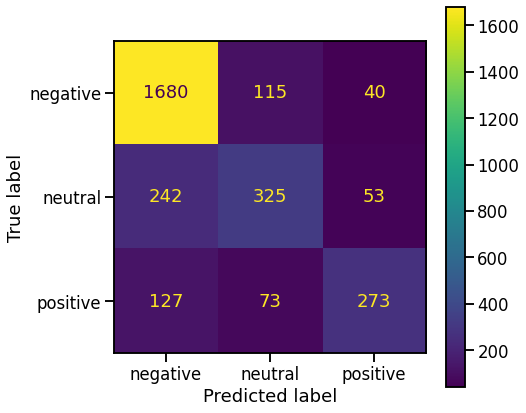

In [ ]:
print("RF MODEL")
eval(rf, X_test_count)

## Ada Boost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(n_estimators= 200, random_state = 42)
ada.fit(X_train_count, y_train)

AdaBoostClassifier(n_estimators=200, random_state=42)

Ada MODEL
              precision    recall  f1-score   support

    negative       0.84      0.86      0.85      1835
     neutral       0.58      0.60      0.59       620
    positive       0.70      0.60      0.65       473

    accuracy                           0.76      2928
   macro avg       0.71      0.69      0.70      2928
weighted avg       0.76      0.76      0.76      2928



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


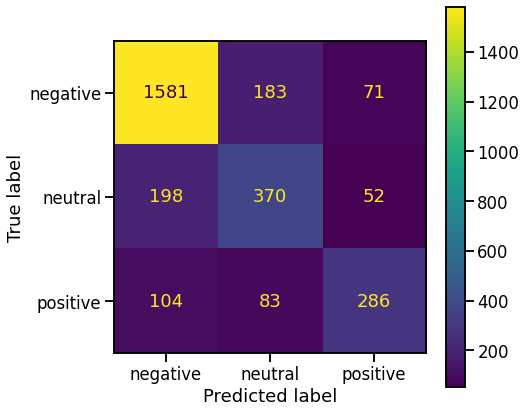

In [ ]:
print("Ada MODEL")
eval(ada, X_test_count)

## TF-IDF

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [24]:
tf_idf_vectorizer = TfidfVectorizer(preprocessor=cleaning, min_df=2, ngram_range=(1,2))
X_train_tf_idf = tf_idf_vectorizer.fit_transform(X_train)
X_test_tf_idf = tf_idf_vectorizer.transform(X_test)

In [ ]:
X_train_tf_idf.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

## Model Comparisons  TF-IDF

## Naive Bayes

In [ ]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(X_train_tf_idf,y_train)

MultinomialNB()

NB MODEL
              precision    recall  f1-score   support

    negative       0.69      0.99      0.81      1835
     neutral       0.75      0.16      0.27       620
    positive       0.89      0.30      0.44       473

    accuracy                           0.70      2928
   macro avg       0.78      0.48      0.51      2928
weighted avg       0.74      0.70      0.64      2928



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


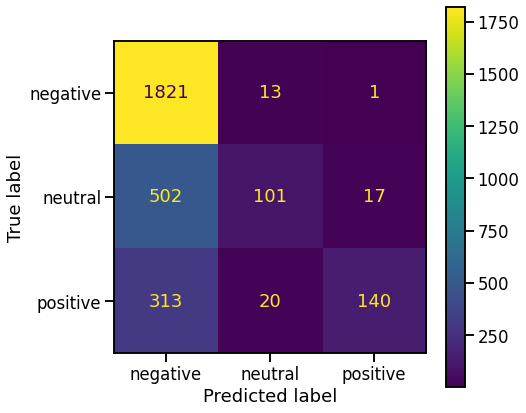

In [ ]:
print("NB MODEL")
eval(nb, X_test_tf_idf)

## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression(max_iter=1000)
log.fit(X_train_tf_idf,y_train)

LogisticRegression(max_iter=1000)

LOG MODEL
              precision    recall  f1-score   support

    negative       0.79      0.95      0.87      1835
     neutral       0.70      0.45      0.55       620
    positive       0.82      0.58      0.68       473

    accuracy                           0.78      2928
   macro avg       0.77      0.66      0.70      2928
weighted avg       0.78      0.78      0.77      2928



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


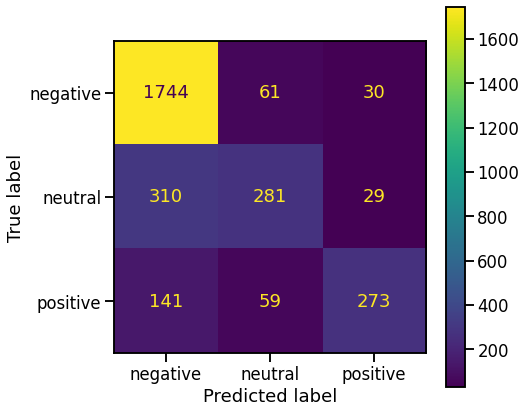

In [ ]:
print("LOG MODEL")
eval(log, X_test_tf_idf)

## SVM

In [ ]:
from sklearn.svm import LinearSVC
svc = LinearSVC()
svc.fit(X_train_tf_idf,y_train)

SVC MODEL
              precision    recall  f1-score   support

    negative       0.83      0.91      0.87      1835
     neutral       0.63      0.54      0.58       620
    positive       0.74      0.63      0.68       473

    accuracy                           0.78      2928
   macro avg       0.74      0.69      0.71      2928
weighted avg       0.77      0.78      0.78      2928



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


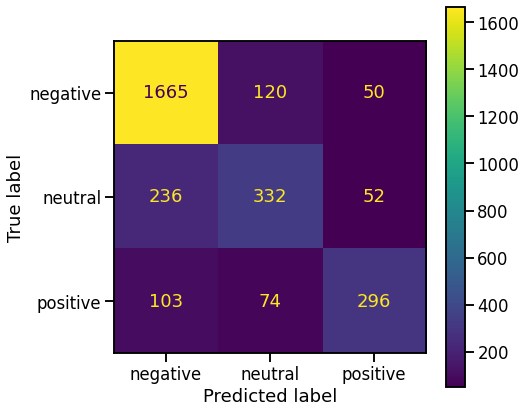

In [ ]:
print("SVC MODEL")
eval(svc, X_test_tf_idf)

## KNN

In [25]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_tf_idf,y_train)

KNeighborsClassifier(n_neighbors=3)

KNN MODEL
              precision    recall  f1-score   support

    negative       0.69      0.97      0.81      1835
     neutral       0.64      0.26      0.37       620
    positive       0.81      0.19      0.30       473

    accuracy                           0.69      2928
   macro avg       0.71      0.47      0.49      2928
weighted avg       0.70      0.69      0.63      2928



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


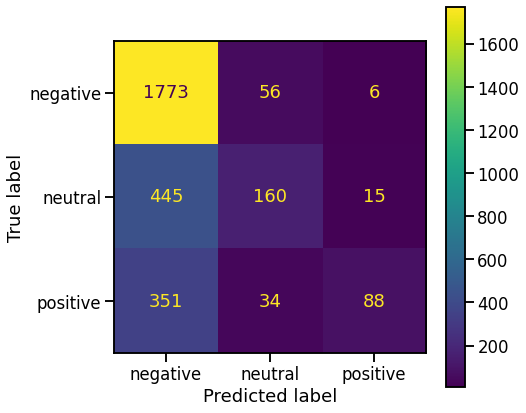

In [ ]:
print("KNN MODEL")
eval(knn, X_test_tf_idf)

## RandomForest

In [ ]:
rf = RandomForestClassifier(200, random_state = 42, n_jobs = -1)
rf.fit(X_train_tf_idf, y_train)

RandomForestClassifier(n_estimators=200, n_jobs=-1, random_state=42)

RF MODEL
              precision    recall  f1-score   support

    negative       0.80      0.93      0.86      1835
     neutral       0.65      0.48      0.55       620
    positive       0.74      0.55      0.63       473

    accuracy                           0.77      2928
   macro avg       0.73      0.65      0.68      2928
weighted avg       0.76      0.77      0.76      2928



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


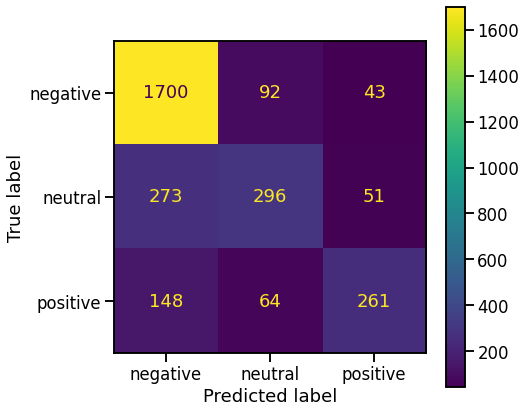

In [ ]:
print("RF MODEL")
eval(rf, X_test_tf_idf)

## Ada Boost

In [ ]:
ada = AdaBoostClassifier(n_estimators= 200, random_state = 42)
ada.fit(X_train_tf_idf, y_train)

AdaBoostClassifier(n_estimators=200, random_state=42)

Ada MODEL
              precision    recall  f1-score   support

    negative       0.82      0.85      0.83      1835
     neutral       0.55      0.53      0.54       620
    positive       0.68      0.63      0.66       473

    accuracy                           0.74      2928
   macro avg       0.68      0.67      0.68      2928
weighted avg       0.74      0.74      0.74      2928



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


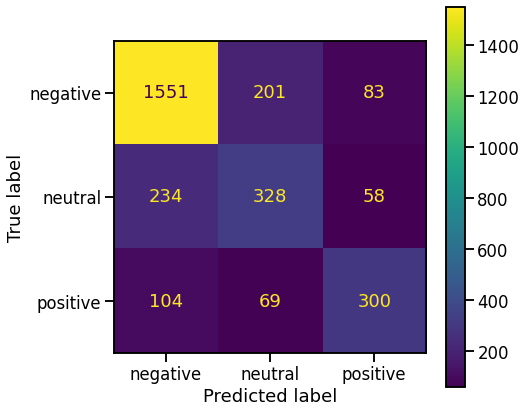

In [ ]:
print("Ada MODEL")
eval(ada, X_test_tf_idf)


In [26]:
def get_results_for_a_given_algorithm(estimator, X_train, y_train, X_test, y_test):

    model = estimator.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    f1_scr = f1_score(y_test, y_pred, average='weighted')
    print(f'{estimator} Evalaution Metrics \n')
    #eval(model, X_test)

    return f1_scr

In [ ]:
classifiers = [AdaBoostClassifier(), LogisticRegression(), RandomForestClassifier(), KNeighborsClassifier(n_neighbors=8)]
score_df = pd.DataFrame()
for idx, classifier in enumerate(classifiers):
    f1 = get_results_for_a_given_algorithm(classifier, X_train_tf_idf, y_train, X_test_tf_idf, y_test)
    score_df.loc[idx, 'model'] = str(classifier).split('(')[0]
    score_df.loc[idx, 'f1_score'] = f1

AdaBoostClassifier() Evalaution Metrics 



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression() Evalaution Metrics 

RandomForestClassifier() Evalaution Metrics 

KNeighborsClassifier(n_neighbors=8) Evalaution Metrics 



In [ ]:
score_df.sort_values(by='f1_score', ascending=False)

,model,f1_score
1,LogisticRegression,0.77
2,RandomForestClassifier,0.75
0,AdaBoostClassifier,0.63
3,KNeighborsClassifier,0.23


## Cross Val

In [ ]:
classifier_names = [str(i).split('(')[0] for i in classifiers]
classifier_names

['AdaBoostClassifier',
 'LogisticRegression',
 'RandomForestClassifier',
 'KNeighborsClassifier']

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score
custom_scorer = {'accuracy': make_scorer(accuracy_score),
                 'precision-neg': make_scorer(precision_score, average='weighted', labels=["negative"]),
                 'recall-neg': make_scorer(recall_score, average='weighted', labels = ["negative"]),
                 'f1-neg': make_scorer(f1_score, average='weighted', labels = ["negative"]),
                 
                 'precision-neutral': make_scorer(precision_score, average='weighted', labels=["neutral"]),
                 'recall-neutral': make_scorer(recall_score, average='weighted', labels = ["neutral"]),
                 'f1-neutral': make_scorer(f1_score, average='weighted', labels = ["neutral"]),
                 
                 'precision-pos': make_scorer(precision_score, average='weighted', labels=["positive"]),
                 'recall-pos': make_scorer(recall_score, average='weighted', labels = ["positive"]),
                 'f1-pos': make_scorer(f1_score, average='weighted', labels = ["positive"]),
                 }

score_dict = dict() 
for idx, estimator in enumerate(classifier_names):
    score_list = []
    for i, j  in custom_scorer.items():
        model = classifiers[idx] #LogisticRegression(max_iter=1000)
        scores = cross_val_score(model, X_train_tf_idf, y_train, cv = 10, scoring = j, n_jobs = -1).mean()
        print(f" {i} score : {scores}\n")
        score_list.append(scores)
    score_dict[estimator]  = score_list

In [ ]:
score_dict

{'AdaBoostClassifier': [0.7073937556972402,
  0.71067981415001,
  0.9579168390144736,
  0.8159100057014124,
  0.6352842183020325,
  0.053248615184099055,
  0.09785158766889199,
  0.6986992316017673,
  0.5925925925925928,
  0.6408397317346982],
 'KNeighborsClassifier': [0.27331061909067944,
  0.6940422091867136,
  0.10281624044976749,
  0.17424771666612884,
  0.2172151883285997,
  0.9068018898664061,
  0.3503439450140825,
  0.7790310218881648,
  0.10476190476190475,
  0.184558091194022],
 'LogisticRegression': [0.7741639339960265,
  0.7835125783977072,
  0.9541055566169501,
  0.8604272939206703,
  0.677904677997928,
  0.4150953079178886,
  0.5145625961638887,
  0.8276878146618124,
  0.546031746031746,
  0.6573292191627125],
 'RandomForestClassifier': [0.75973335549357,
  0.7874891057694338,
  0.9241452321640887,
  0.849826847314956,
  0.635814155045727,
  0.43445829260345387,
  0.5178986269404797,
  0.7516995437899192,
  0.534920634920635,
  0.6299446235054668]}

In [ ]:
columns = []
for key in custom_scorer.keys():
    columns.append(key)

In [ ]:
score_df = pd.DataFrame([score_dict])
score_df = score_df.T
score_df.rename(columns={0:'score'}, inplace=True)
score_df

,score
AdaBoostClassifier,"[0.7073937556972402, 0.71067981415001, 0.9579168390144736, 0.8159100057014124, 0.6352842183020325, 0.053248615184099055, 0.09785158766889199, 0.6986992316017673, 0.5925925925925928, 0.6408397317346982]"
LogisticRegression,"[0.7741639339960265, 0.7835125783977072, 0.9541055566169501, 0.8604272939206703, 0.677904677997928, 0.4150953079178886, 0.5145625961638887, 0.8276878146618124, 0.546031746031746, 0.6573292191627125]"
RandomForestClassifier,"[0.75973335549357, 0.7874891057694338, 0.9241452321640887, 0.849826847314956, 0.635814155045727, 0.43445829260345387, 0.5178986269404797, 0.7516995437899192, 0.534920634920635, 0.6299446235054668]"
KNeighborsClassifier,"[0.27331061909067944, 0.6940422091867136, 0.10281624044976749, 0.17424771666612884, 0.2172151883285997, 0.9068018898664061, 0.3503439450140825, 0.7790310218881648, 0.10476190476190475, 0.184558091194022]"


In [ ]:
score_df = pd.DataFrame(score_df['score'].tolist(), columns=columns)
score_df.index = classifier_names
score_df

,accuracy,precision-neg,recall-neg,f1-neg,precision-neutral,recall-neutral,f1-neutral,precision-pos,recall-pos,f1-pos
AdaBoostClassifier,0.71,0.71,0.96,0.82,0.64,0.05,0.10,0.70,0.59,0.64
LogisticRegression,0.77,0.78,0.95,0.86,0.68,0.42,0.51,0.83,0.55,0.66
RandomForestClassifier,0.76,0.79,0.92,0.85,0.64,0.43,0.52,0.75,0.53,0.63
KNeighborsClassifier,0.27,0.69,0.10,0.17,0.22,0.91,0.35,0.78,0.10,0.18


## For New Tweets, prediction with pipeline


In [27]:
from sklearn.pipeline import Pipeline


In [28]:
from sklearn.pipeline import Pipeline
pipe = Pipeline([('tfidf',TfidfVectorizer(preprocessor=cleaning, min_df=2, ngram_range=(1,2))),
                 ('log',LogisticRegression(max_iter=1000))])

In [29]:
df3 = df.copy()
df3 = df3[['airline_sentiment', 'text']]
df3.rename(columns={'airline_sentiment':'sentiment'}, inplace=True)

In [ ]:
df3.sample()

,sentiment,text
13970,neutral,@AmericanAir its Adolfo Garcia


In [30]:
pipe.fit(df3["text"], df3["sentiment"])

Pipeline(steps=[('tfidf',
                 TfidfVectorizer(min_df=2, ngram_range=(1, 2),
                                 preprocessor=<function cleaning at 0x7f9381b073a0>)),
                ('log', LogisticRegression(max_iter=1000))])

In [31]:
tweet = "it was the worst flight i have ever been" # data should be either pd.Series or list
tweet = pd.Series(tweet).apply(cleaning)
pipe.predict(tweet)[0]

'negative'

In [ ]:
tweet = "don't enjoy flight  at all"
tweet = pd.Series(tweet).apply(cleaning)
pipe.predict(tweet)[0]

'negative'

In [ ]:
tweet = "ok flight"
tweet = pd.Series(tweet).apply(cleaning)
pipe.predict(tweet)[0]

'neutral'

In [ ]:
tweet = "it was amazing"
tweet = pd.Series(tweet).apply(cleaning)
pipe.predict(tweet)[0]

'positive'

In [ ]:
results = pipe.predict(["ok" , "I really loved the customer service"])
for idx, result in enumerate(results):
    print(f'{idx+1}. sentiment is', result)

1. sentiment is neutral
2. sentiment is negative


## WordCloud - Repetition of Words

In [32]:
tweets = df3["text"]
tweets

0                                                                                                                           @VirginAmerica What @dhepburn said.
1                                                                                      @VirginAmerica plus you've added commercials to the experience... tacky.
2                                                                                       @VirginAmerica I didn't today... Must mean I need to take another trip!
3                                @VirginAmerica it's really aggressive to blast obnoxious "entertainment" in your guests' faces &amp; they have little recourse
4                                                                                                       @VirginAmerica and it's a really big bad thing about it
                                                                                  ...                                                                          
14635                                   

In [33]:
all_words = " ".join(tweets)

In [ ]:
#all_words[:100]

## Collect Words

In [ ]:
from wordcloud import WordCloud

## Create Word Cloud

In [ ]:
from wordcloud import WordCloud, ImageColorGenerator 
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
# create a mask based on the image we wish to include
# create a wordcloud 
wc = WordCloud(background_color='white',
               collocations=False,
               width=600,
               height=300,
               contour_width=3,
               max_font_size=256,
               contour_color='black',
               stopwords=stop_words)

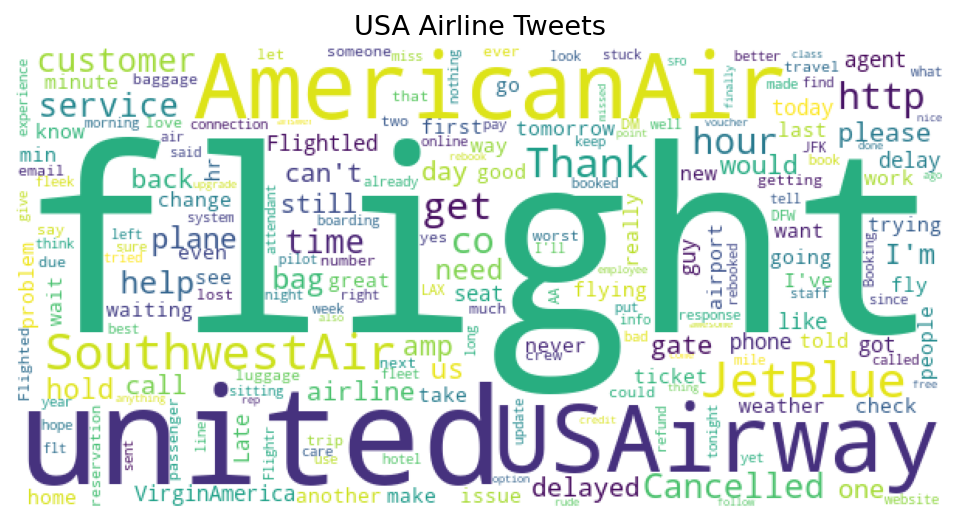

In [ ]:
wc.generate(all_words)
import matplotlib.pyplot as plt
plt.figure(figsize = (8,8), dpi =150)
plt.imshow(wc)
plt.axis("off")
plt.title('USA Airline Tweets', fontsize=13)
plt.show();

## Counting words

In [ ]:
counter = Counter(word_tokenize(all_words))

In [ ]:
counter.most_common(50)

In [35]:
!pip install zeugma

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for zeugma: filename=zeugma-0.49-py3-none-any.whl size=8821 sha256=1932c4be794ea2afe591b6052498995ba89fff9cb2c4a40b89d0db162c7cdd9b
  Stored in directory: /root/.cache/pip/wheels/fc/11/b8/c898c895af50055b770c4d7c67d834fdd9dfdd25805d683f79
Successfully built zeugma


In [36]:
from zeugma.embeddings import EmbeddingTransformer

glove = EmbeddingTransformer('glove')

[==================================================] 100.0% 104.8/104.8MB downloaded


In [ ]:
df3['text'].sample()

4604    Never got to the strip that fast before. Stoked for special @Imaginedragons show tonight! Thx again @SouthwestAir! http://t.co/ToPqmVqnJp
Name: text, dtype: object

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df3['text'], df3['airline_sentiment'], test_size=0.2, stratify=y, random_state=4299)

In [ ]:
X_train.head(2)

3013     @united haha and you have to clean a plane that was held overnight in a hangar. Sounds lovely. Also don't lie on screensand say it's weather
13868                                                                                  @AmericanAir you have let me down. Seriously. #unhappycustomer
Name: text, dtype: object

In [ ]:
y_train.head(2)

3013     negative
13868    negative
Name: airline_sentiment, dtype: object

In [ ]:
import numpy as np
X_train_v = glove.transform(np.array(X_train))

X_train_v

array([[-0.10906965,  0.17500706,  0.02396466, ...,  0.26588765,
         0.0137344 , -0.16246867],
       [-0.0489448 ,  0.47938013, -0.2340898 , ...,  0.59382   ,
         0.610882  , -0.25290602],
       [ 0.03264835,  0.2515361 ,  0.10929502, ...,  0.10871976,
        -0.09007218, -0.24441184],
       ...,
       [ 0.02231565,  0.27146497,  0.02653653, ...,  0.17181289,
         0.01508977, -0.31971362],
       [-0.49418   ,  0.73261166,  0.08015484, ..., -0.33376   ,
        -0.34743333, -0.41318467],
       [-0.8846475 , -0.09334501, -0.04534999, ..., -0.535025  ,
         0.9291925 , -0.2338175 ]], dtype=float32)

In [ ]:
X_train_v.shape

(11712, 25)

In [ ]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train_v, y_train)

LogisticRegression(max_iter=1000)

In [ ]:
X_test_v = glove.transform(X_test)
model.predict(X_test_v)

array(['negative', 'negative', 'negative', ..., 'negative', 'negative',
       'negative'], dtype=object)

In [ ]:
def eval(model, X_test):
    preds = model.predict(X_test)
    print(classification_report(y_test,preds))
    sns.set_context('talk')
    fig, ax = plt.subplots(figsize=(7, 7))
    plot_confusion_matrix(model, X_test, y_test, ax = ax, values_format = '.0f')

              precision    recall  f1-score   support

    negative       0.70      0.96      0.81      1835
     neutral       0.66      0.15      0.25       620
    positive       0.57      0.35      0.43       473

    accuracy                           0.69      2928
   macro avg       0.64      0.49      0.50      2928
weighted avg       0.67      0.69      0.63      2928



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


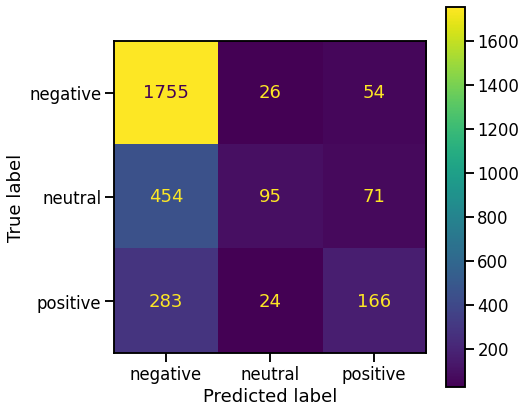

In [ ]:
eval(model, X_test_v)

In [ ]:
df3['clean_text'] = df3['text'].apply(cleaning)
X_train, X_test, y_train, y_test = train_test_split(df3['clean_text'], df3['airline_sentiment'], test_size=0.2, stratify=y, random_state=4299)

LogisticRegression(max_iter=1000)

              precision    recall  f1-score   support

    negative       0.75      0.94      0.83      1835
     neutral       0.57      0.29      0.38       620
    positive       0.69      0.46      0.55       473

    accuracy                           0.72      2928
   macro avg       0.67      0.56      0.59      2928
weighted avg       0.70      0.72      0.69      2928



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


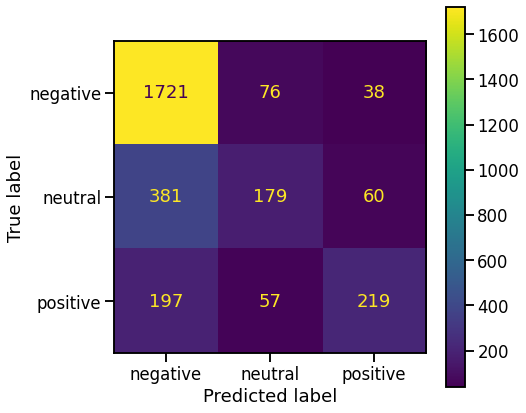

In [ ]:
model = LogisticRegression(max_iter=1000)
X_train_v = glove.transform(np.array(X_train))
model.fit(X_train_v, y_train)
X_test_v = glove.transform(X_test)
eval(model, X_test_v)

In [ ]:
import gensim
glove_vectors = gensim.downloader.load('glove-twitter-100')

[==================================================] 100.0% 387.1/387.1MB downloaded


In [ ]:
glove_vectors.most_similar('flight')

[('plane', 0.82042396068573),
 ('flights', 0.7610695958137512),
 ('boarding', 0.7130967378616333),
 ('jet', 0.7065738439559937),
 ('flying', 0.7037381529808044),
 ('shuttle', 0.6984449028968811),
 ('landing', 0.6837233901023865),
 ('heading', 0.6766395568847656),
 ('travel', 0.6723277568817139),
 ('airlines', 0.6697458624839783)]

In [ ]:
glove_vectors.most_similar('customer')

[('customers', 0.7877328991889954),
 ('client', 0.7851800322532654),
 ('service', 0.7685834169387817),
 ('employee', 0.7547966241836548),
 ('company', 0.7507853507995605),
 ('business', 0.7270476222038269),
 ('job', 0.7210277318954468),
 ('retail', 0.7127808928489685),
 ('services', 0.7061830163002014),
 ('management', 0.6990330219268799)]

In [ ]:
glove_vectors.most_similar('terrible')

[('horrible', 0.9354996085166931),
 ('awful', 0.7781704068183899),
 ('bad', 0.7227418422698975),
 ('idea', 0.7106223702430725),
 ('cruel', 0.6856734752655029),
 ('such', 0.6765841245651245),
 ('brutal', 0.676552951335907),
 ('sick', 0.6753833293914795),
 ('quite', 0.6748831272125244),
 ('worst', 0.6739187240600586)]

In [ ]:
print(glove_vectors.doesnt_match(["breakfast", "cereal", "dinner", "lunch"]))

cereal


/usr/local/lib/python3.7/dist-packages/gensim/models/keyedvectors.py:895: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  vectors = vstack(self.word_vec(word, use_norm=True) for word in used_words).astype(REAL)


In [ ]:
print(glove_vectors.doesnt_match(["flight", "happy", "satisfied", "joyful"]))

flight


/usr/local/lib/python3.7/dist-packages/gensim/models/keyedvectors.py:895: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  vectors = vstack(self.word_vec(word, use_norm=True) for word in used_words).astype(REAL)


In [ ]:
print(glove_vectors.most_similar(positive=['baghdad', 'england'], negative=['london']))

[('iraq', 0.5298022627830505), ('shiite', 0.52146315574646), ('threaten', 0.5143966674804688), ('mortars', 0.5098307728767395), ('kaduna', 0.5060756802558899), ('misbah', 0.5000345706939697), ('iraqi', 0.4983777105808258), ('quetta', 0.4983764886856079), ('afghanistan', 0.49797767400741577), ('afganistan', 0.4973593056201935)]


In [ ]:
print(glove_vectors.most_similar(positive=['desktop', 'car'], negative=['transmission']))

[('laptop', 0.6756982803344727), ('ipad', 0.6698228120803833), ('iphone', 0.6519309878349304), ('computer', 0.6483266353607178), ('ipod', 0.6392689347267151), ('phone', 0.6325434446334839), ('screen', 0.6318767070770264), ('pc', 0.6244949102401733), ('windows', 0.6222385764122009), ('note', 0.6054658889770508)]


In [ ]:
print(glove_vectors.most_similar(positive=['uncle', 'woman'], negative=['aunt']))

[('guy', 0.7867931127548218), ('father', 0.7036442756652832), ('boy', 0.7027621269226074), ('him', 0.6877518892288208), ('man', 0.6855872869491577), ('young', 0.6835072040557861), ('his', 0.6783839464187622), ('who', 0.6735948324203491), ('gentleman', 0.6691364645957947), ('himself', 0.6680467128753662)]
